In [1]:
from decision_region import *
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
import matplotlib.pyplot as plt

c:\users\om\envs\keras\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
def gen_spiral(deltaT, label):
    num_samples = 1000
    n = num_samples // 2
    noise = 1.2
    points = []
    for i in range(n):
        r = i/ n * 20
        t = 2.4  * i /n * math.pi + deltaT
        x = r * math.sin(t) + rand_uniform(-1, 1) * noise
        y = r * math.cos(t) + rand_uniform(-1, 1) * noise
        points.append((x, y, label))
    
    return points

def rand_uniform(x, y):
    return random.random() * (y- x) + x

def XORdata(num_samples):

    def get_XOR_label(x, y):
        _ = x*y
        if _ >= 0:
            if _ <= 3:
                return 3
            else:
                return 1
        elif _ >= -3:
            return 3
        else:
            return 2

    points = []
    num_samples = num_samples
    noise = 0.15
    for i in range(num_samples):
        x = rand_uniform(-5, 5)
        padding = 0.3
        x += padding if x > 0 else -padding
        y = rand_uniform(-5, 5)
        y += padding if y > 0 else -padding
        noiseX = rand_uniform(-5, 5) * noise
        noiseY = rand_uniform(-5, 5) * noise
        label = get_XOR_label(x+noiseX, y+noiseY)
        points.append((x, y, label))

    return points 

def gen_circle():
    num_samples = 1000
    radius = 5
    points = []
    noise = 0.5
    
    def get_label(x, y):
        dist = math.sqrt(x ** 2 + y ** 2)
        return 0 if dist < radius * 0.5 else 1
    
    for i in range(num_samples//2):
        r = rand_uniform(0, radius * 0.5)
        angle = rand_uniform(0, 2 * math.pi)
        x = r * math.sin(angle)
        y = r * math.cos(angle)
        noiseX = rand_uniform((-1)*radius, radius) * noise
        noiseY = rand_uniform((-1)*radius, radius) * noise
#         label = get_label(noiseX, noiseY)
        label = 0
        points.append((x, y, label))
    
    for i in range(num_samples // 2):
        r = rand_uniform(radius * 0.7, radius)
        angle = rand_uniform(0, 2 * math.pi)
        x = r * math.sin(angle)
        y = r * math.cos(angle)
        noiseX = rand_uniform((-1)*radius, radius) * noise
        noiseY = rand_uniform((-1)*radius, radius) * noise
        #label = get_label(noiseX, noiseY)
        label = 1
        points.append((x, y, label))
        
    return points
        

In [46]:
l = gen_spiral(0, 1)
m = gen_spiral(math.pi, 0)

l = np.array(l)
m = np.array(m)

l.shape, m.shape

((500, 3), (500, 3))

In [47]:
train = pd.DataFrame(np.vstack((l,m)))
train.head()

,0,1,2
0,0.769205,-1.049271,1.0
1,0.353243,-0.075362,1.0
2,1.096166,0.329226,1.0
3,1.118030,1.293276,1.0
4,0.306306,-0.769023,1.0


In [48]:
model = Sequential()
model.add(layers.Dense(8, activation='relu', input_shape=((2,))))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()
model.compile(loss='mse', optimizer='rmsprop', metrics=['acc'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 8)                 24        
_________________________________________________________________
dense_14 (Dense)             (None, 4)                 36        
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 5         
Total params: 65
Trainable params: 65
Non-trainable params: 0
_________________________________________________________________


In [49]:
train_x = []
train_y = []
l = (np.vstack((l, m)))
np.random.shuffle(l)
for i in l:
    train_x.append([i[0], i[1]])
    train_y.append(i[2])

train_x = np.array(train_x)
train_y = np.array(train_y)
# train_y = to_categorical(train_y)
train_x.shape, train_y.shape

((1000, 2), (1000,))

In [52]:
hist = model.fit(train_x, train_y, batch_size=20, epochs=100, verbose=False)
model.evaluate(train_x, train_y)

1000/1000 [==============================] - 0s 27us/step


[0.04169044440984726, 0.924]

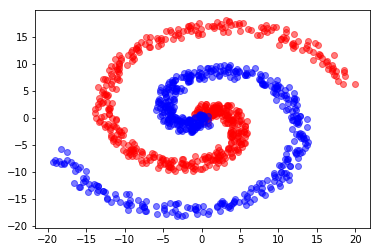

In [53]:
plt.scatter(train[train[2]==1.0][0], train[train[2]==1.0][1], c='r', alpha=0.51)
plt.scatter(train[train[2]==0][0], train[train[2]==0][1], c='b', alpha=0.51)

In [54]:
p = DecisionBoundary(21, resolution=80)

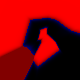

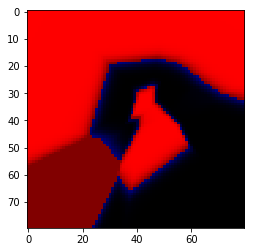

In [55]:
p.draw_keras(model)

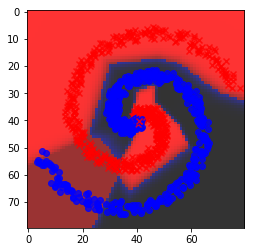

In [56]:
p.plot_with_data(train_x, train_y, alpha=0.8)

In [12]:
from sklearn.svm import SVC

In [13]:
clf = SVC()

In [14]:
clf.fit(train_x, train_y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [15]:
clf.score(train_x, train_y)

0.986

In [16]:
def predict(x1, x2):
    return clf.predict(np.array([[x1, x2]]))[0]

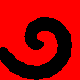

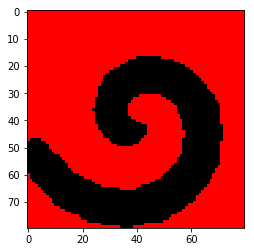

In [17]:
p.draw(predict)

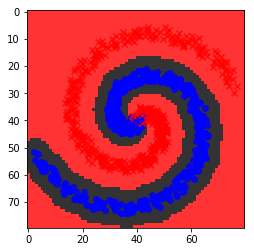

In [18]:
p.plot_with_data(train_x, train_y, alpha=0.8)

In [19]:
o = XORdata(1000)
o = np.array(o)
epochs = 100
learning_rate = 0.001
train = pd.DataFrame(o)

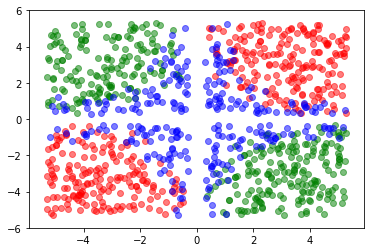

In [20]:
plt.scatter(train[train[2]==1][0], train[train[2]==1][1], c='r', label='class 1', alpha=0.51)
plt.scatter(train[train[2]==2][0], train[train[2]==2][1], c='g', label='class 1', alpha=0.51)
plt.scatter(train[train[2]==3][0], train[train[2]==3][1], c='b', label='class 0', alpha=0.51)

In [21]:
train_x = []
train_y_cat = []
train_y = []
np.random.shuffle(o)
for i in o:
    train_x.append([i[0], i[1]])
    if i[2] == 1:
        train_y_cat.append([1, 0, 0])
    elif i[2] == 2:
        train_y_cat.append([0, 1, 0])
    else:
        train_y_cat.append([0, 0, 1])
        
    train_y.append(i[2])

train_x = np.array(train_x)
train_y_cat = np.array(train_y_cat)
train_y = np.array(train_y)
train_x.shape, train_y_cat.shape, train_y.shape


((1000, 2), (1000, 3), (1000,))

In [34]:
model = Sequential()
model.add(layers.Dense(8, activation='relu', input_shape=((2,))))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))
model.summary()
model.compile(loss='mse', optimizer='rmsprop', metrics=['acc'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 8)                 24        
_________________________________________________________________
dense_8 (Dense)              (None, 4)                 36        
_________________________________________________________________
dense_9 (Dense)              (None, 3)                 15        
Total params: 75
Trainable params: 75
Non-trainable params: 0
_________________________________________________________________


In [37]:
model.fit(train_x, train_y_cat, epochs=100, batch_size=16, verbose=False)
model.evaluate(train_x, train_y_cat)

1000/1000 [==============================] - 0s 39us/step


[0.05160407282412052, 0.885]

In [24]:
p2 = DecisionBoundary(6, resolution=80)

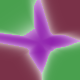

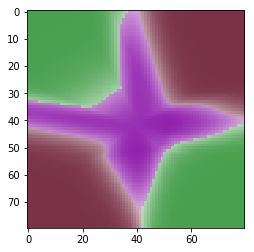

In [25]:
p2.draw_keras(model)

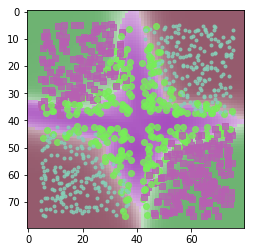

In [26]:
p2.plot_with_data(train_x, train_y_cat, alpha=0.8)

In [27]:
clf1 = SVC()

In [28]:
clf1.fit(train_x, train_y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [29]:
clf1.score(train_x, train_y)

0.889

In [30]:
def predict(x1, x2):
    _=clf1.predict(np.array([[x1, x2]]))[0]
    if _ == 1:
        return np.array([1, 0, 0])
    elif _ == 2:
        return np.array([0, 1, 0])
    else:
        return np.array([0, 0, 1])

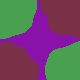

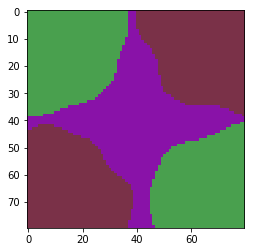

In [31]:
p2.draw_categorical(predict, 3)

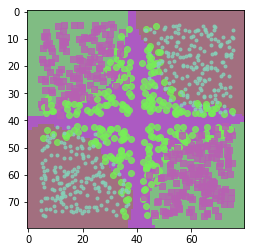

In [32]:
p2.plot_with_data(train_x, train_y_cat)